<a href="https://colab.research.google.com/github/NiccoloSalvi/naml/blob/main/ANN_XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feed-forward Artificial Neural Networks

In [151]:
import numpy as np
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
import time

## Learning the XOR function

Let us consider the XOR ("exclusive or") function. The [truth table](https://en.wikipedia.org/wiki/Exclusive_or#Truth_table) of the XOR function is:

In [152]:
inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])
outputs = np.array([[0],
                    [1],
                    [1],
                    [0]])

We consider a fully connected ANN with the following architechture and with $\tanh(\cdot)$ as activation function:

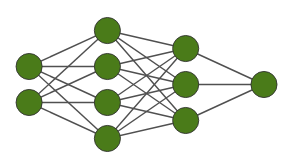

The input of the network are the truth values of the two inputs (0 = False, 1 = True). The output is the **likelihood** (the "probability") of the truth value of the result. Hence, we want the output to be in $[0, 1]$. For this reason, we apply the activation function also to the last layer, and we rescale the output between 0 and 1.


The architecture is defined by the following **hyperparameters** (the hyperparameters must be initialized before the training phase: shows the number of neurons in each layer):

In [153]:
n1, n2, n3, n4 = 2, 4, 3, 1

Define the parameters (weights and biases) of the ANN.
Initialize the weights sampling from a standard normal distribution, and initialize to zero the biases.

Define both the weights and the biases as a 2-dimensional `numpy` array.

In [154]:
np.random.seed(0) # for reproducibility

# W2 is (4 x 2)
W2 = np.random.randn(n1 * n2).reshape(n2, n1) # alternately: W2 = np.random.randn(n2, n1)
# b2 is (n2 x 1)
b2 = np.zeros(n2).reshape(n2, 1) # alternately: b2 = np.zeros((n2, 1))

# W3 is (3 x 4)
W3 = np.random.randn(n2 * n3).reshape(n3, n2)
# b3 is (3 x 1)
b3 = np.zeros(n3).reshape(n3, 1)

# W4 is (1 x 3)
W4 = np.random.randn(n3 * n4).reshape(n4, n3)
# b4 is (1 x 1)
b4 = np.zeros(n4).reshape(n4, 1)

# W2 is (4 x 2)
# W2 = np.array([
#     [w_21_11, w_21_12],
#     [w_22_11, w_22_12],
#     [w_23_11, w_23_12],
#     [w_24_11, w_24_12]
# ])
# b2 = np.zeros(n2)

# W3 is (3 x 4)
# W3 = np.array([
#     [w_31_21, w_31_22, w_31_23],
#     [w_32_21, w_32_22, w_32_23],
#     [w_33_21, w_33_22, w_33_23]
# ])
# b3 = np.zeros(n3)

# W4 is (1 x 3)
# W4 = np.array([
#     [w_41_31, w_41_32, w_41_33],
# ])
# b4 = np.zeros(n4)

# Ws = [W2, W3, W4]
# bs = [b2, b3, b4]
params = [W2, b2, W3, b3, W4, b4]

Define a function that implements the ANN:
```python
def ANN(x, params):
  ...
```
with inputs:
- `x`: num_samples by 2 `numpy` array
- `params`: list of the parameters
and with output
- `y`: num_samples by 1 `numpy` array

Then, test the function on `inputs` and `params`.

In [155]:
def ANN(x, params):
    W2, b2, W3, b3, W4, b4 = params
    # sigma = lambda y : jnp.tanh(y)

    activation_fn_layer1 = x.T
    activation_fn_layer2 = jnp.tanh(W2 @ activation_fn_layer1 + b2)
    activation_fn_layer3 = jnp.tanh(W3 @ activation_fn_layer2 + b3)
    activation_fn_layer4 = jnp.tanh(W4 @ activation_fn_layer3 + b4)

    # scale the result
    activation_fn_layer4 = (1.0 + activation_fn_layer4) / 2.0

    return activation_fn_layer4.T

Print the truth table associated with the ANN.

In [156]:
for a in (0, 1):
  for b in (0, 1):
    print('%d XOR %d --> %f' % (a, b, float(ANN(np.array([[a, b]]), params)[0, 0])))

0 XOR 0 --> 0.500000
0 XOR 1 --> 0.572242
1 XOR 0 --> 0.107804
1 XOR 1 --> 0.109878


Define a function that computes the quadratic loss on a set of data:

```python
def loss_quadratic(x, y, params):
  ...
```
with inputs:
- `x`: num_samples by 2 `numpy` array
- `y`: num_samples by 1 `numpy` array
- `params`: list of the parameters
and with output
- `loss`: scalar

Then, test the function on `inputs`, `outputs` and `params`.

---

The **quadratic loss function**, also known as the **Mean Squared Error (MSE)**, is commonly used in regression tasks to measure the difference between the predicted outputs of a neural network and the actual target values. In the context of neural networks, the quadratic loss is used during the training process to adjust the network's weights, helping it make more accurate predictions.

### **1. Definition of Quadratic Loss (MSE) in Neural Networks**

The quadratic loss function can be defined as:

$$
L(y, \hat{y}) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$

Where:
- $N$ is the total number of samples in the dataset (or batch).
- $y_i$ is the true target value for the $i$-th sample.
- $\hat{y}_i$ is the predicted value by the neural network for the $i$-th sample.

### **2. Why Use Quadratic Loss?**
1. **Regression Tasks:** The quadratic loss is appropriate when you are trying to predict continuous values (e.g., predicting house prices, temperatures, etc.).
2. **Penalizes Larger Errors:** The quadratic loss penalizes larger errors more heavily than smaller ones because of the squaring operation. This helps the network learn to minimize larger discrepancies.
3. **Smooth Differentiable Function:** The quadratic loss is smooth and differentiable, which means that it is easy to optimize using gradient-based methods like Gradient Descent.

In [157]:
def loss_quadratic(x, y, params):
    error = ANN(x, params) - y
    return jnp.sum(error ** 2)

loss_quadratic(inputs, outputs, params)

Array(1.2410641, dtype=float32)

Define a function that computes the cross-entropy loss on a set of data:
```python
def loss_crossentropy(x, y, params):
  ...
```
with inputs:
- `x`: num_samples by 2 `numpy` array
- `y`: num_samples by 1 `numpy` array
- `params`: list of the parameters
and with output
- `loss`: scalar

Then, test the function on `inputs`, `outputs` and `params`.

---

The **cross-entropy loss function**, also known as **log loss** or **negative log-likelihood**, is a widely used loss function in machine learning, especially for **classification tasks**. It is particularly effective for **multi-class classification** and **binary classification**, where the goal is to measure the distance between the predicted probabilities and the actual class labels.

### **1. What is Cross-Entropy?**

In probability and information theory, cross-entropy measures the difference between two probability distributions. In the context of machine learning, it quantifies how far the predicted probability distribution $\hat{y}$ is from the true distribution $y$.

### **2. Why Use Cross-Entropy Loss?**

- **Probabilistic Interpretation:** Cross-entropy loss provides a way to compare probability distributions. When training a classification model, you often want the model to output probabilities (values between 0 and 1) that reflect the likelihood of each class. Cross-entropy helps adjust the weights to minimize the difference between predicted and actual probabilities.
- **Effective for Classification:** Unlike quadratic loss, which penalizes large errors more, cross-entropy can handle the case where the true labels are categorical, making it more suitable for classification problems.

### **3. Mathematical Definition**

The cross-entropy loss differs slightly depending on whether you're working with **binary classification** or **multi-class classification**.

#### **3.1 Binary Classification**

For binary classification, where the target $y$ can be either 0 or 1, and the predicted probability $\hat{y}$ represents the probability of the class being 1, the cross-entropy loss is defined as:

$$
L(y, \hat{y}) = -[y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y})]
$$

- $y$ is the true label (0 or 1).
- $\hat{y}$ is the predicted probability that the output is 1.

**Interpretation:**
- If the true label is 1, the loss focuses on $-\log(\hat{y})$, penalizing the model if $\hat{y}$ is low.
- If the true label is 0, the loss focuses on $-\log(1 - \hat{y})$, penalizing the model if $\hat{y}$ is high.

#### **3.2 Multi-Class Classification**

For multi-class classification, where there are $C$ possible classes, the target is represented as a **one-hot encoded vector**, and the output of the model is a vector of probabilities. The cross-entropy loss is:

$$
L(y, \hat{y}) = -\sum_{c=1}^{C} y_c \cdot \log(\hat{y}_c)
$$

- $y_c$ is 1 if the true class is $c$, and 0 otherwise (one-hot encoding).
- $\hat{y}_c$ is the predicted probability for class $c$.

**Interpretation:**
- The loss focuses on the predicted probability of the true class. It will be low if the model assigns a high probability to the correct class and high if the model assigns a low probability.

### **4. How Cross-Entropy Loss Works in Neural Networks**

During training, the cross-entropy loss function guides the neural network by adjusting the weights through **backpropagation**. Here’s how it fits into the training loop:

1. **Forward Pass:** The input data is passed through the network, and it outputs a vector of predicted probabilities $\hat{y}$.
2. **Loss Computation:** The cross-entropy loss function compares $\hat{y}$ with the true label $y$, resulting in a scalar loss value.
3. **Backpropagation:** The gradients of the loss with respect to the network’s weights are calculated, allowing the network to learn how to adjust the weights.
4. **Weight Update:** The weights are adjusted using an optimization algorithm (like Gradient Descent, Adam, etc.) to minimize the cross-entropy loss.

In [158]:
def loss_crossentropy(x, y, params):
    y_hat = ANN(x, params)
    return -jnp.sum(y * jnp.log(y_hat) + (1 - y) * jnp.log(1 - y_hat))

loss_crossentropy(inputs, outputs, params)

Array(3.5951784, dtype=float32)

Using the JIT module of JAX, compile both the losses defined above and their gradients w.r.t. the parameters.

In [159]:
loss_quad_jit = jax.jit(loss_quadratic)
grad_quad_jit = jax.jit(jax.grad(loss_quadratic, argnums = 2))
loss_Xent_jit = jax.jit(loss_crossentropy)
grad_Xent_jit = jax.jit(jax.grad(loss_crossentropy, argnums = 2))

Implement the GD (gradient descent) method, with learning rate 0.1 and train the ANN, using either the quadratic or the cross-entropy loss function.
Collect the training history of both loss functions at each training epoch and plot them.

Finally, print the truth table associated with the ANN and compute its accuracy.

Execution time: 1.09e+00


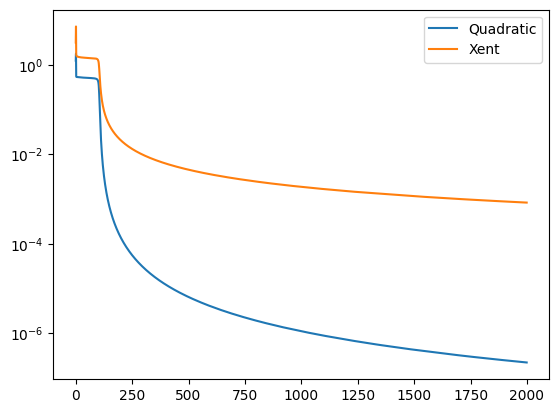

In [160]:
grad = grad_Xent_jit
learning_rate = 0.1
num_epochs = 2000

history_quad = list()
history_Xent = list()

t0 = time.time()

for epoch in range(num_epochs):
    grads = grad(inputs, outputs, params)

    for i in range(len(params)):
        params[i] -= learning_rate * grads[i]

    history_quad.append(loss_quad_jit(inputs, outputs, params))
    history_Xent.append(loss_Xent_jit(inputs, outputs, params))

print("Execution time: %1.2e" %(time.time() - t0))
plt.semilogy(history_quad, label="Quadratic")
plt.semilogy(history_Xent, label="Xent")
plt.legend()

In [163]:
for a in (0, 1):
  for b in (0, 1):
    print('%d XOR %d --> %f' % (a, b, float(ANN(np.array([[a, b]]), params)[0, 0])))

0 XOR 0 --> 0.000080
0 XOR 1 --> 0.999850
1 XOR 0 --> 0.999621
1 XOR 1 --> 0.000226


In [162]:
TP = ANN(np.array([[1, 0], [0, 1]]), params)
TN = 1 - ANN(np.array([[1, 1], [0, 0]]), params)
accuracy = (sum(TP) + sum(TN)) / 4
print(accuracy)

[0.9997913]
